In [1]:
from __future__ import annotations
import math
import numpy as np
from enum import Enum
from bin_repr2 import dec2bin, bin2gray, my_map, inverse_map, bin2dec, gray2bin
import copy
import random 
import matplotlib.pyplot as plt
from typing import Callable,  NamedTuple

class Representation(Enum):
    BIN = 0
    GRAY = 1
    DECIMAL = 2

# Problemas de optimización
Este laboratorio se mostrará varios métodos de selección como la selección proporcional, ranking lineal, torneo, uniforme y selección ruleta, luego se medirá la intensidad de selección en un problema de minimización.
## 1. Dado los siguientes problemas de minimización de una función $\min_\mathbf{x}f(\mathbf{x})$


In [80]:
f1 = lambda x: x[0]**4 + 5*x[0]**3 + 4*x[0]**2 - 4*x[0] + 1
f2 = lambda x: 0.2 + x[0]**2 + x[1]**2 - 0.1*math.cos(6*math.pi*x[0]) - 0.1*math.sin(6*math.pi*x[1])
f3 = lambda x: math.pow(1/6.931 - x[0]*x[1]/(x[2]*x[3]), 2)


Dominio

In [81]:
domain_1, n_var_1 = [-4.0, 1], 1
domain_2, n_var_2 = [-1, 1.0], 2
domain_3, n_var_3 = [12, 60.], 4


Parámetros del individuo tipados

In [ ]:
class IndividualArguments(NamedTuple):
    domain: tuple[int, int]
    eps: float
    n_var: int
    gen_size: int
    f: Callable[[float], float]
    default_repr: Representation = Representation.DECIMAL

Clase individuo 

In [108]:
class Individual():
    def __init__(self, phenotype: list[float], args: IndividualArguments):
        self.domain = args.domain
        self.eps = args.eps
        self.n_var = args.n_var
        self.gen_size = args.gen_size
        self.f = args.f
        self.default_repr = args.default_repr
        self.phenotype = phenotype

    def getFitness(self):
        return self.f(self.phenotype)

    def getGenotype(self, my_repr: Representation = None):
        my_repr = self.default_repr if my_repr == None else my_repr
        list_repr: list[int] = []
        if my_repr == Representation.BIN:
            for gen in self.phenotype:
                list_repr.extend(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), gen_size=self.gen_size))
        elif my_repr == Representation.GRAY:
            for gen in self.phenotype:
                list_repr.extend(bin2gray(dec2bin(num=my_map(gen, self.domain[0], self.domain[1], self.eps), gen_size=self.gen_size)))
        else:
            list_repr = copy.deepcopy(self.phenotype)
        return list_repr

    @classmethod
    def new(cls, genotype, args: IndividualArguments):
        phenotype: list[int] = []
        if args.default_repr == Representation.BIN:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gen), args.domain[0], args.domain[1]))
        elif args.default_repr == Representation.GRAY:
            for k in range(args.n_var):
                gen = genotype[args.gen_size * k:args.gen_size * (k + 1)]
                phenotype.append(inverse_map(bin2dec(gray2bin(gen)), args.domain[0], args.eps))
        else:
            phenotype = copy.deepcopy(genotype)
        
        return Individual(phenotype, args)

    @classmethod
    def newLike(cls, genotype: list[int], parent: Individual):
        args = IndividualArguments(parent.domain, parent.eps, parent.n_var, parent.gen_size, f1, parent.default_repr)
        return Individual.new(genotype, args)

    @classmethod
    def newRandom(cls, args: IndividualArguments):
        phenotype = [random.uniform(args.domain[0], args.domain[1]) for _ in range(args.n_var)]
        return Individual(phenotype, args)


### a) Representación del problema (1)
Implemente un programa en python que represente el cromosoma como una cadena binaria de 10 dígitos (10 bits) y muestre/imprima el Fenotipo y su representación binaria para una población de 10 individuos.

In [83]:
POPULATION_SIZE = 10
GEN_SIZE_1 = 10
eps_1 = (domain_1[1] - domain_1[0]) / (2**GEN_SIZE_1 - 1)
N_POINTS_1 = 2**GEN_SIZE_1

args1 = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1)

population_1 = [Individual.newRandom(args1) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_1):
    print(f"Individuo {i} = {ind.phenotype} \n {ind.getGenotype(Representation.BIN)}")


Representación binaria
Individuo 0 = [-3.828476347859115] 
 [0, 0, 0, 0, 1, 0, 0, 0, 1, 1]
Individuo 1 = [-3.805614026847155] 
 [0, 0, 0, 0, 1, 0, 1, 0, 0, 0]
Individuo 2 = [-3.870497548639369] 
 [0, 0, 0, 0, 0, 1, 1, 0, 1, 0]
Individuo 3 = [0.7546972195042656] 
 [1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Individuo 4 = [0.6598584192685202] 
 [1, 1, 1, 0, 1, 1, 1, 0, 0, 1]
Individuo 5 = [0.7686091997978304] 
 [1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
Individuo 6 = [-0.7427134228890715] 
 [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
Individuo 7 = [-2.4404897389099824] 
 [0, 1, 0, 0, 1, 1, 1, 1, 1, 1]
Individuo 8 = [-1.4954316950844713] 
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo 9 = [-2.6264368214662146] 
 [0, 1, 0, 0, 0, 1, 1, 0, 0, 1]


Realizar lo mismo del ítem anterior para la representación en código de Gray.

In [84]:
print("Representación en código Gray")
for i, ind in enumerate(population_1):
    print(f"Individuo {i} = {ind.phenotype} \n {ind.getGenotype(Representation.GRAY)}")

Representación en código Gray
Individuo 0 = [-3.828476347859115] 
 [0, 0, 0, 0, 1, 1, 0, 0, 1, 0]
Individuo 1 = [-3.805614026847155] 
 [0, 0, 0, 0, 1, 1, 1, 1, 0, 0]
Individuo 2 = [-3.870497548639369] 
 [0, 0, 0, 0, 0, 1, 0, 1, 1, 1]
Individuo 3 = [0.7546972195042656] 
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 1]
Individuo 4 = [0.6598584192685202] 
 [1, 0, 0, 1, 1, 0, 0, 1, 0, 1]
Individuo 5 = [0.7686091997978304] 
 [1, 0, 0, 0, 1, 1, 1, 0, 0, 0]
Individuo 6 = [-0.7427134228890715] 
 [1, 1, 1, 1, 0, 1, 0, 1, 1, 1]
Individuo 7 = [-2.4404897389099824] 
 [0, 1, 1, 0, 1, 0, 0, 0, 0, 0]
Individuo 8 = [-1.4954316950844713] 
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Individuo 9 = [-2.6264368214662146] 
 [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]


Considerando las representaciones anteriores (cadena de 10 bits) ¿cual sería el tamaño del espacio intrínseco?


In [85]:
print(f"El espacio intrinseco tendrería {N_POINTS_1} elementos con una precisión de {eps_1}")

El espacio intrinseco tendrería 1024 elementos con una precisión de 0.004887585532746823


### b) Representación del problema (2):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x, y$ estén representados por 5 bits cada uno y luego muestre/imprima el Fenotipo y su
representación binaria.

In [86]:
POPULATION_SIZE = 10
GEN_SIZE_2 = 5
eps_2 = (domain_2[1] - domain_2[0]) / (2**GEN_SIZE_2 - 1)
N_POINTS_2 = 2**GEN_SIZE_2

args2 = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2)

population_2 = [Individual.newRandom(args2) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.getGenotype(Representation.BIN)}")


Representación binaria
Individuo 0 = [1, 0, 1, 0, 0, 0, 1, 0, 0, 1]
Individuo 1 = [0, 0, 0, 0, 1, 0, 1, 0, 1, 0]
Individuo 2 = [0, 1, 0, 0, 1, 1, 0, 0, 0, 0]
Individuo 3 = [0, 0, 1, 1, 1, 1, 0, 0, 0, 1]
Individuo 4 = [1, 1, 0, 0, 0, 0, 1, 0, 1, 1]
Individuo 5 = [0, 0, 0, 1, 1, 1, 0, 0, 1, 0]
Individuo 6 = [0, 1, 1, 0, 1, 1, 0, 0, 1, 1]
Individuo 7 = [1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
Individuo 8 = [1, 0, 1, 0, 0, 1, 0, 1, 0, 1]
Individuo 9 = [0, 1, 0, 1, 1, 0, 0, 0, 1, 1]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [87]:
print("Representación en código Gray")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.getGenotype(Representation.GRAY)}")

Representación en código Gray
Individuo 0 = [1, 1, 1, 1, 0, 0, 1, 1, 0, 1]
Individuo 1 = [0, 0, 0, 0, 1, 0, 1, 1, 1, 1]
Individuo 2 = [0, 1, 1, 0, 1, 1, 1, 0, 0, 0]
Individuo 3 = [0, 0, 1, 0, 0, 1, 1, 0, 0, 1]
Individuo 4 = [1, 0, 1, 0, 0, 0, 1, 1, 1, 0]
Individuo 5 = [0, 0, 0, 1, 0, 1, 1, 0, 1, 1]
Individuo 6 = [0, 1, 0, 1, 1, 1, 1, 0, 1, 0]
Individuo 7 = [1, 1, 0, 0, 1, 0, 1, 0, 1, 0]
Individuo 8 = [1, 1, 1, 1, 0, 1, 1, 1, 1, 1]
Individuo 9 = [0, 1, 1, 1, 0, 0, 0, 0, 1, 0]


In [88]:
print("Representación decimal")
for i, ind in enumerate(population_2):
    print(f"Individuo {i} = {ind.phenotype}")

Representación decimal
Individuo 0 = [0.27644822684893366, -0.4412952023333818]
Individuo 1 = [-0.9232745471185231, -0.354921257126521]
Individuo 2 = [-0.447778489248172, 0.06203171847858879]
Individuo 3 = [-0.5622568352281427, 0.0831786226331126]
Individuo 4 = [0.5321358543659551, -0.2656922693182351]
Individuo 5 = [-0.7841349554093018, 0.1300921335024121]
Individuo 6 = [-0.1863076271130233, 0.21170676302918734]
Individuo 7 = [0.1026710822528425, -0.23944250068320816]
Individuo 8 = [0.2964410686146841, 0.34467485383443974]
Individuo 9 = [-0.2918922373387409, -0.7997605679501949]


Considerando las representaciones anteriores (cadena de 10 bits y representación real) ¿cual sería el tamaño del espacio intrínseco?


In [89]:
print(f"El espacio intrinseco tendrería {N_POINTS_2} elementos con una precisión de {eps_2}")

El espacio intrinseco tendrería 32 elementos con una precisión de 0.06451612903225806


### Representación del problema (3):

Implemente un programa en python que represente el cromosoma como una cadena binaria donde $x_1, x_2, x_3, x_4$ estén representados por 6 bits cada uno y luego muestre/imprima el Fenotipo y su representación binaria.


In [90]:
POPULATION_SIZE = 10
GEN_SIZE_3 = 6
eps_3 = (60 - 12) / (2**GEN_SIZE_3 - 1)
N_POINTS_3 = 2**GEN_SIZE_3

args3 = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3)

population_3 = [Individual.newRandom(args3) for _ in range(POPULATION_SIZE)]
print("Representación binaria")
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.BIN)}")


Representación binaria
Individuo 0 = [0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0]
Individuo 1 = [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0]
Individuo 2 = [1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0]
Individuo 3 = [1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
Individuo 4 = [0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0]
Individuo 5 = [1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0]
Individuo 6 = [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0]
Individuo 7 = [0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1]
Individuo 8 = [1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1]
Individuo 9 = [1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]


Realizar lo mismo del ítem anterior para la representación en código de Gray

In [91]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.GRAY)}")

Individuo 0 = [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0]
Individuo 1 = [0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0]
Individuo 2 = [1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]
Individuo 3 = [1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1]
Individuo 4 = [0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1]
Individuo 5 = [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
Individuo 6 = [0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0]
Individuo 7 = [0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1]
Individuo 8 = [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1]
Individuo 9 = [1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1]


Realizar lo mismo del ítem anterior para la representación real.

In [92]:
for i, ind in enumerate(population_3):
    print(f"Individuo {i} = {ind.getGenotype(Representation.DECIMAL)}")

Individuo 0 = [23.11261713004408, 40.50240183130443, 22.254098602784612, 45.41293055795936]
Individuo 1 = [22.752438858514793, 14.919635493148581, 20.323385767382987, 27.33035539756263]
Individuo 2 = [43.58337628933883, 58.305511017539175, 18.368532908870307, 25.84358814611467]
Individuo 3 = [52.87964856070816, 37.98230315877258, 31.535020320241173, 37.687773222031254]
Individuo 4 = [16.81024890390171, 20.910837783292806, 30.963999884550308, 28.877793933031]
Individuo 5 = [39.74688351336265, 13.050727378888778, 29.729872422397577, 30.353375636796777]
Individuo 6 = [20.636036364340672, 32.78165823885479, 53.21598187791565, 24.29505076005926]
Individuo 7 = [32.8826977020806, 35.07032589368987, 30.731420241195067, 46.026449290507465]
Individuo 8 = [41.39812694054731, 13.295058767227378, 39.40214651775395, 22.206812301532015]
Individuo 9 = [38.47906674144972, 53.315462483224835, 32.992282956640175, 49.200491031151444]


Considerando las representaciones anteriores (cadena de bits, representación real) ¿cual seria el tamaño del espacio intrínseco

In [93]:
print(f"El espacio intrinseco tendrería {N_POINTS_3} elementos con una precisión de {eps_3}")

El espacio intrinseco tendrería 64 elementos con una precisión de 0.7619047619047619


## 2. Gestión de la población: de la teoría se sabe que los métodos de selección son independientes del método de representación del algoritmo evolutivo, implemente los siguientes métodos de selección en python:

### Método de selección proporcional


In [94]:
def selection_proportional(population: list[Individual]) -> list[Individual]:
    sorted_population = sorted(population, key=lambda ind: ind.getFitness(), reverse=True)
    fitness_sum = sum([ind.getFitness() for ind in population])
    selected: list[Individual] = []

    for _ in range(len(sorted_population)):
        # giramos la ruleta tantas veces como individuos existan
        shave = random.random() * fitness_sum
        roulette_sum = 0
        # recorremos los individuos en orden decreciente
        for ind in sorted_population:
            # como se recorre en orden decreciente tenemos que sumar el valor del fitness para saber donde cae
            roulette_sum += ind.getFitness()
            # en el primero que sea mayor es cuando cae la ruleta asi que lo seleccionamos
            if roulette_sum > shave:
                selected.append(ind)
                break
    return selected

In [95]:
selection = selection_proportional(population_2)
for i, ind in enumerate(selection):
    print(f"{ind.getGenotype(Representation.DECIMAL)}")

[-0.9232745471185231, -0.354921257126521]
[-0.9232745471185231, -0.354921257126521]
[-0.1863076271130233, 0.21170676302918734]
[0.5321358543659551, -0.2656922693182351]
[-0.447778489248172, 0.06203171847858879]
[-0.5622568352281427, 0.0831786226331126]
[-0.5622568352281427, 0.0831786226331126]
[0.2964410686146841, 0.34467485383443974]
[0.1026710822528425, -0.23944250068320816]
[-0.7841349554093018, 0.1300921335024121]


### Método de selección basada en ranking lineal


In [96]:
def selection_rank(population: list[Individual]):
    sorted_population = sorted(population, key=lambda ind: ind.getFitness(), reverse=True)
    rank_distance = 1 / len(population)
    ranks = [1 - i * rank_distance for i in range(len(population))]
    ranks_sum = sum(ranks)

    selected: list[Individual] = []
    
    for _ in range(len(sorted_population)):
        shave = random.random() * ranks_sum
        rank_sum = 0
        for i in range(len(sorted_population)):
            rank_sum += ranks[i]
            if rank_sum > shave:
                selected.append(sorted_population[i])
                break
    return selected


In [97]:
selection = selection_rank(population_2)
for i, ind in enumerate(selection):
    print(f"{ind.getGenotype(Representation.DECIMAL)}")

[-0.1863076271130233, 0.21170676302918734]
[-0.447778489248172, 0.06203171847858879]
[-0.447778489248172, 0.06203171847858879]
[0.27644822684893366, -0.4412952023333818]
[-0.5622568352281427, 0.0831786226331126]
[-0.9232745471185231, -0.354921257126521]
[-0.2918922373387409, -0.7997605679501949]
[-0.2918922373387409, -0.7997605679501949]
[0.2964410686146841, 0.34467485383443974]
[-0.1863076271130233, 0.21170676302918734]


### Método de torneo

In [98]:
def tournament_selection(population: list[Individual]):
    # tournament selection
    tournament_size = 3
    new_offspring: list[Individual] = []
    for _ in range(len(population)):
        # select max of each 5 until has len(population) individuals
        candidates = [random.choice(population) for _ in range(tournament_size)]
        new_offspring.append(min(candidates, key=lambda ind: ind.getFitness()))
    return new_offspring


In [99]:
selection = tournament_selection(population_2)
for i, ind in enumerate(selection):
    print(f"{ind.getGenotype(Representation.DECIMAL)}")

[0.2964410686146841, 0.34467485383443974]
[-0.1863076271130233, 0.21170676302918734]
[-0.447778489248172, 0.06203171847858879]
[0.2964410686146841, 0.34467485383443974]
[-0.447778489248172, 0.06203171847858879]
[0.2964410686146841, 0.34467485383443974]
[-0.447778489248172, 0.06203171847858879]
[0.27644822684893366, -0.4412952023333818]
[0.1026710822528425, -0.23944250068320816]
[0.1026710822528425, -0.23944250068320816]


## 3. Evaluación de la intensidad de selección: para los problemas planteados en la pregunta (1) evaluar la presión de selección considerando los siguientes casos.

In [116]:
def crossover_one_point(p1: Individual, p2: Individual, cross_ratio):
    # one-point random-crossover
    if random.random() < cross_ratio:
        c1 = copy.deepcopy(p1.getGenotype())
        c2 = copy.deepcopy(p2.getGenotype())
       
        point = random.randint(1, len(c1) - 2)
       
        c1[point:], c2[point:] = c2[point:], c1[point:]
        return Individual.newLike(c1, p1), Individual.newLike(c2, p2)
    else:
        return p1, p2


In [126]:
def mutation(ind: Individual, mut_ratio):
    mut = copy.deepcopy(ind.getGenotype())
    if random.random() < mut_ratio:
        # punto aleatorio de la cadea
        point = random.randint(0, len(mut) - 1)

        if len(mut) > ind.n_var:
            mut[point] = (mut[point] + 1) % 2
        else:
            mut[point] = random.uniform(ind.domain[0], ind.domain[1])
    return Individual.newLike(mut, ind)


In [103]:
def get_best(population: list[Individual]):
    best = population[0]
    for ind in population:
        if ind.getFitness() < best.getFitness():
            best = ind
    return best


a) Para el primer caso (ecuación 1) considerar la representación binaria, una población inicial 15 individuos del cual debe seleccionar 10 padres y crear 10 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 15 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generation: 100
Generation: 200
Generation: 300
Generation: 400
Generation: 500
Generation: 600
Generation: 700
Generation: 800
Generation: 900
Generation: 1000


Text(0.5, 1.0, 'Generation number 1000')

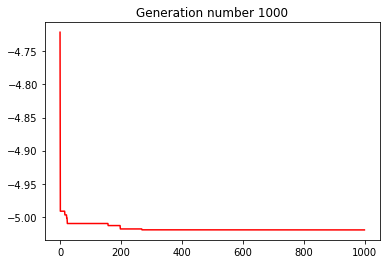

In [119]:
# GA CANONICAL FLOW
POPULATION_SIZE = 15
CROSSOVER_RATIO = 0.8
MUTATION_RATIO = 0.01
generation_number = 0

args = IndividualArguments(domain_1, eps_1, n_var_1, GEN_SIZE_1, f1, Representation.BIN)
population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]
MAX_GENERATION = 1000
best: list[Individual] = []

# SE DETIENE DESPUES DE 500 GENERACIONES
while generation_number < MAX_GENERATION:
    generation_number += 1
    # SELECCION DE PADRES
    parents = tournament_selection(population)
    crossed_offspring: list[Individual] = []
    # CRUZAMIENTO
    for p1, p2 in zip(parents[::2], parents[1::2]):
        kid1, kid2 = crossover_one_point(p1, p2, CROSSOVER_RATIO)
        crossed_offspring.append(kid1)
        crossed_offspring.append(kid2)
    # MUTACION
    mutated_offspring: list[Individual] = []
    for mutant in crossed_offspring:
        mutated_offspring.append(mutation(mutant, MUTATION_RATIO))

    population = mutated_offspring.copy()

    best.append(get_best(population))
    if generation_number%100 == 0:
        print("Generation:", generation_number)

plt.plot([f1(x.phenotype) for x in best], "r-")
plt.title(f"Generation number {generation_number}")


In [121]:
solution = get_best(best)
print(f"Min: {solution.phenotype}")

Min: [-2.9589442815249267]


b) Para el segundo caso (ecuación 2) considerar la representación Gray, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generation: 100
Generation: 200
Generation: 300
Generation: 400
Generation: 500
Generation: 600
Generation: 700
Generation: 800
Generation: 900
Generation: 1000


Text(0.5, 1.0, 'Generation number 1000')

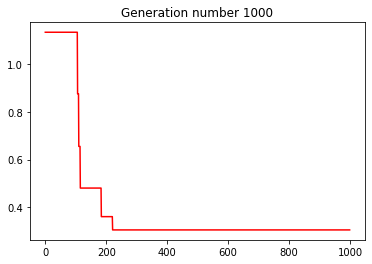

In [130]:
# GA CANONICAL FLOW
POPULATION_SIZE = 20
CROSSOVER_RATIO = 0.8
MUTATION_RATIO = 0.01
generation_number = 0

args = IndividualArguments(domain_2, eps_2, n_var_2, GEN_SIZE_2, f2, Representation.GRAY)
population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]
MAX_GENERATION = 1000
best: list[Individual] = []

# SE DETIENE DESPUES DE 500 GENERACIONES
while generation_number < MAX_GENERATION:
    generation_number += 1
    # SELECCION DE PADRES
    parents = tournament_selection(population)
    crossed_offspring: list[Individual] = []
    # CRUZAMIENTO
    for p1, p2 in zip(parents[::2], parents[1::2]):
        kid1, kid2 = crossover_one_point(p1, p2, CROSSOVER_RATIO)
        crossed_offspring.append(kid1)
        crossed_offspring.append(kid2)
    # MUTACION
    mutated_offspring: list[Individual] = []
    for mutant in crossed_offspring:
        mutated_offspring.append(mutation(mutant, MUTATION_RATIO))

    population = mutated_offspring.copy()

    best.append(get_best(population))
    if generation_number%100 == 0:
        print("Generation:", generation_number)

plt.plot([f1(x.phenotype) for x in best], "r-")
plt.title(f"Generation number {generation_number}")


In [123]:
solution = get_best(best)
print(f"Min: {solution.phenotype}")

Min: [0.29032258064516125, 0.7419354838709677]


c) Para el tercer caso (ecuación 3) considerar la representación real, una población inicial 20 individuos del cual debe seleccionar 15 padres y crear 15 descendientes, una taza de cruce de 0.8, una tasa de mutación de 0.01, donde el cruce y la mutación son seleccionadas de forma aleatoria (Usando los mismos criterios del ejemplo mostrado en Colab-note) realizar lo siguiente:

• Usando el método de torneo para la selección de las nuevas generaciones (constantes de 20 individuos), evalúe la intensidad de selección para cada uno de los métodos de selección en la pregunta (2).


Generation: 100
Generation: 200
Generation: 300
Generation: 400
Generation: 500
Generation: 600
Generation: 700
Generation: 800
Generation: 900
Generation: 1000


Text(0.5, 1.0, 'Generation number 1000')

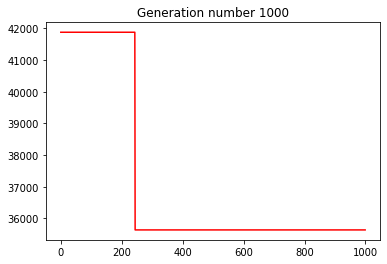

In [131]:
# GA CANONICAL FLOW
POPULATION_SIZE = 20
CROSSOVER_RATIO = 0.8
MUTATION_RATIO = 0.01
generation_number = 0

args = IndividualArguments(domain_3, eps_3, n_var_3, GEN_SIZE_3, f3, Representation.DECIMAL)
population = [Individual.newRandom(args) for _ in range(POPULATION_SIZE)]
MAX_GENERATION = 1000
best: list[Individual] = []

# SE DETIENE DESPUES DE 500 GENERACIONES
while generation_number < MAX_GENERATION:
    generation_number += 1
    # SELECCION DE PADRES
    parents = tournament_selection(population)
    crossed_offspring: list[Individual] = []
    # CRUZAMIENTO
    for p1, p2 in zip(parents[::2], parents[1::2]):
        kid1, kid2 = crossover_one_point(p1, p2, CROSSOVER_RATIO)
        crossed_offspring.append(kid1)
        crossed_offspring.append(kid2)
    # MUTACION
    mutated_offspring: list[Individual] = []
    for mutant in crossed_offspring:
        mutated_offspring.append(mutation(mutant, MUTATION_RATIO))

    population = mutated_offspring.copy()

    best.append(get_best(population))
    if generation_number%100 == 0:
        print("Generation:", generation_number)

plt.plot([f1(x.phenotype) for x in best], "r-")
plt.title(f"Generation number {generation_number}")


In [132]:
solution = get_best(best)
print(f"Min: {solution.phenotype}")

Min: [12.585047470039596, 35.56297445285591, 52.13495759313953, 40.85694442202052]
